In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
from glob import glob

In [2]:
# Read in the weather data, filter it down to just Seattle and Sequim, select time, temp and precip columns,
# and create proper date and time objects.

df = pd.read_parquet("weather_data.parquet")
df_wa = df.query('stationID in ["KWASEATT2743", "KWASEQUI431"]').\
filter(items=['stationID','obsTimeLocal','imperial.temp','imperial.precipTotal']).\
copy()

df_wa['datetime'] = pd.to_datetime(df_wa['obsTimeLocal'])
df_wa['year'] = df_wa['datetime'].dt.year
df_wa['date'] = df_wa['datetime'].dt.date
df_wa['TimeOnly']=df_wa['datetime'].dt.strftime('%-H:%-M')

df_wa.head()

,stationID,obsTimeLocal,imperial.temp,imperial.precipTotal,datetime,year,date,TimeOnly
132,KWASEATT2743,2022-08-04 00:59:44,59.0,0.0,2022-08-04 00:59:44,2022,2022-08-04,0:59
133,KWASEATT2743,2022-08-04 01:59:59,59.0,0.0,2022-08-04 01:59:59,2022,2022-08-04,1:59
134,KWASEATT2743,2022-08-04 02:59:56,59.0,0.0,2022-08-04 02:59:56,2022,2022-08-04,2:59
135,KWASEATT2743,2022-08-04 03:59:54,58.0,0.0,2022-08-04 03:59:54,2022,2022-08-04,3:59
136,KWASEATT2743,2022-08-04 04:59:51,58.0,0.0,2022-08-04 04:59:51,2022,2022-08-04,4:59


In [3]:
df_wa.query("`imperial.temp` > 80").head()

,stationID,obsTimeLocal,imperial.temp,imperial.precipTotal,datetime,year,date,TimeOnly
194,KWASEATT2743,2022-08-06 14:59:48,81.0,0.0,2022-08-06 14:59:48,2022,2022-08-06,14:59
195,KWASEATT2743,2022-08-06 15:59:45,81.0,0.0,2022-08-06 15:59:45,2022,2022-08-06,15:59
216,KWASEATT2743,2022-08-07 12:59:59,83.0,0.0,2022-08-07 12:59:59,2022,2022-08-07,12:59
217,KWASEATT2743,2022-08-07 13:59:56,84.0,0.0,2022-08-07 13:59:56,2022,2022-08-07,13:59
218,KWASEATT2743,2022-08-07 14:59:54,85.0,0.0,2022-08-07 14:59:54,2022,2022-08-07,14:59


In [4]:
df_wa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19156 entries, 132 to 58337
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   stationID             19156 non-null  object        
 1   obsTimeLocal          19156 non-null  object        
 2   imperial.temp         19156 non-null  float64       
 3   imperial.precipTotal  19156 non-null  float64       
 4   datetime              19156 non-null  datetime64[ns]
 5   year                  19156 non-null  int32         
 6   date                  19156 non-null  object        
 7   TimeOnly              19156 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(1), object(4)
memory usage: 1.2+ MB


In [5]:
'''Verify that the time of day makes sense.  DO this by looking at a day where the temps got above 80 deg in Seattle.
The time of day should be around 3 or 4 PM.'''

import datetime
# what is the column data type?  ans: 'datetime'
df_wa['date'].iloc[0]

hot_day = df_wa.query('date == @datetime.date(2022, 8, 6) & stationID == "KWASEATT2743"').\
filter(items=['stationID','imperial.temp','datetime', 'TimeOnly']).copy()

hot_day.rename(columns={"imperial.temp":"temp"}, inplace=True)

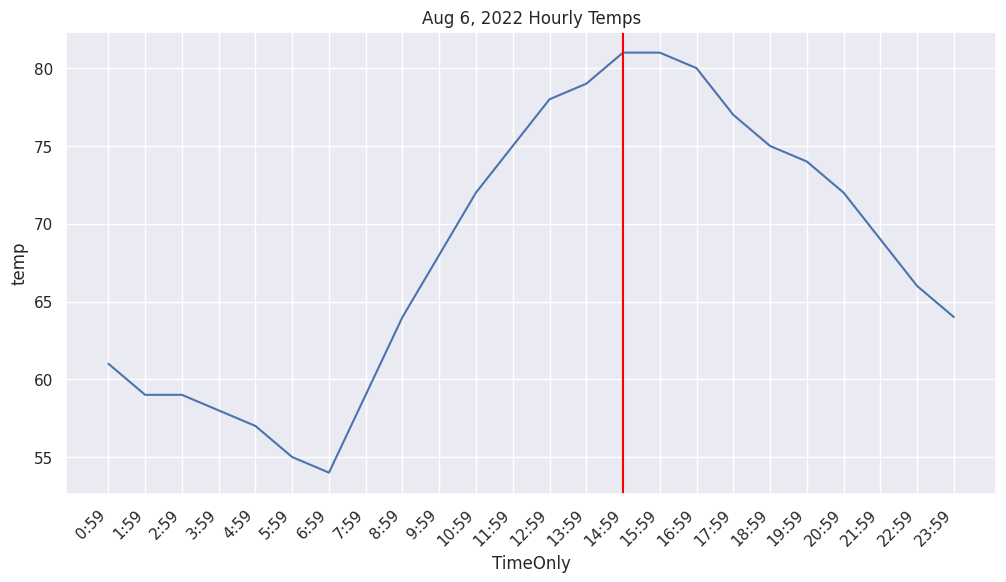

In [6]:
# Plot this junk
sb.set_theme()
sb.set(rc={'figure.figsize':(12,6)})
sb.lineplot(hot_day, x="TimeOnly", y="temp").set_title('Aug 6, 2022 Hourly Temps')
plt.xticks(rotation=45, ha='right')
plt.axvline(x=14, color='red')
plt.show()

In [7]:
import os
os.getcwd()

'/home/randre/temp'